### Task 1: Sentiment Labeling

In [2]:
!pip install transformers

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 7.6 MB/s eta 0:00:008.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 1.9 MB/s eta 0:00:002.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 2.2 MB/s eta 0:00:002.1 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [transformers]0m 7/8 [transformers]ub]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [5]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 MB 2.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.4 MB/s eta 0:00:003.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [torch]━━━━━ 1/2 [torch]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [12]:
!pip install textblob

from textblob import TextBlob
import pandas as pd

# Load data
df = pd.read_csv('test(in).csv')
print("Columns:", df.columns.tolist())

# Detect correct column
text_col = 'body' if 'body' in df.columns else 'message'

# Define sentiment logic
def label_sentiment(text):
    if pd.isna(text):
        return 'Neutral'
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

# Apply
df['sentiment'] = df[text_col].apply(label_sentiment)

# View sample output
print(df[['from', text_col, 'sentiment']].head())

# Save result
df.to_csv('sentiment_output.csv', index=False)
print("\n✅ Sentiment analysis complete → saved as sentiment_output.csv")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [textblob]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Columns: ['Subject', 'body', 'date', 'from']
                      from                                               body  \
0     sally.beck@enron.com  EnronOptions Announcement\n\n\nWe have updated...   
1      eric.bass@enron.com  Marc,\n\nUnfortunately, today is not going to ...   
2     sally.beck@enron.com  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...   
3  johnny.palmer@enron.com  we were thinking papasitos (we can meet somewh...   
4  lydia.delgado@enron.com  Since you never gave me the $20 for the last t...   

  sentiment  
0  Positive  
1   Neutral  
2   Neutral  
3  Negative  
4   Neutral  

✅ Sentiment analysis complete → saved as sentiment_output

In [13]:
pip install torch torchvision torchaudio transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.1/809.1 kB 2.9 MB/s eta 0:00:002.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [torchaudio] 1/2 [torchaudio]

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


### Task 2: EDA

In [14]:
!pip install pandas matplotlib seaborn textblob


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your updated dataset (with sentiment)
df = pd.read_csv('sentiment_output.csv')

# Show basic info
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB
None
                                        Subject  \
0                          EnronOptions Update!   
1                                  (No Subject)   
2  Phone Screen  Interview - Shannon L. Burnham   
3                         RE: My new work email   
4                                           Bet   

                                                body       date  \
0  EnronOptions Announcement\n\n\nWe have updated...  5/10/2010   
1  Marc,\n\nUnfortunately, today is not going to ...  7/29/2010   
2  When: Wednesday, June 06, 2001 10:00 AM-11:00 ...  7/25/2011   


In [16]:
# Shape and nulls
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Summary stats for numeric columns
print("\nDescriptive statistics:\n", df.describe(include='all'))

Shape: (2191, 5)

Missing values:
 Subject      0
body         0
date         0
from         0
sentiment    0
dtype: int64

Descriptive statistics:
              Subject   body      date                     from sentiment
count           2191   2191      2191                     2191      2191
unique          1251   1539       690                       10         3
top     (No Subject)  \n\n   7/1/2011  lydia.delgado@enron.com   Neutral
freq             141     21         9                      284      1056


/var/folders/c1/ypskr8394dlf3rvwrjmf4g940000gn/T/ipykernel_8843/2201336345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


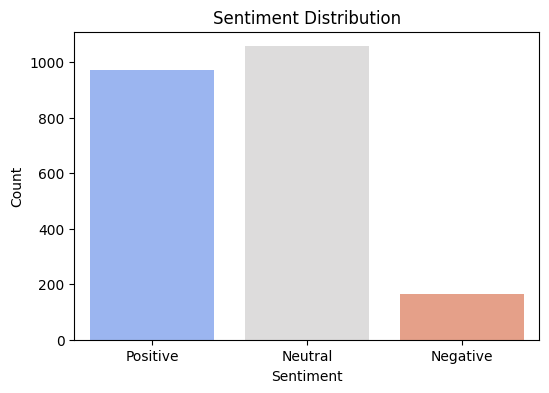

sentiment
Neutral     48.197170
Positive    44.317663
Negative     7.485167
Name: proportion, dtype: float64


In [17]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Count values
print(df['sentiment'].value_counts(normalize=True) * 100)


In [19]:
!pip install wordcloud


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


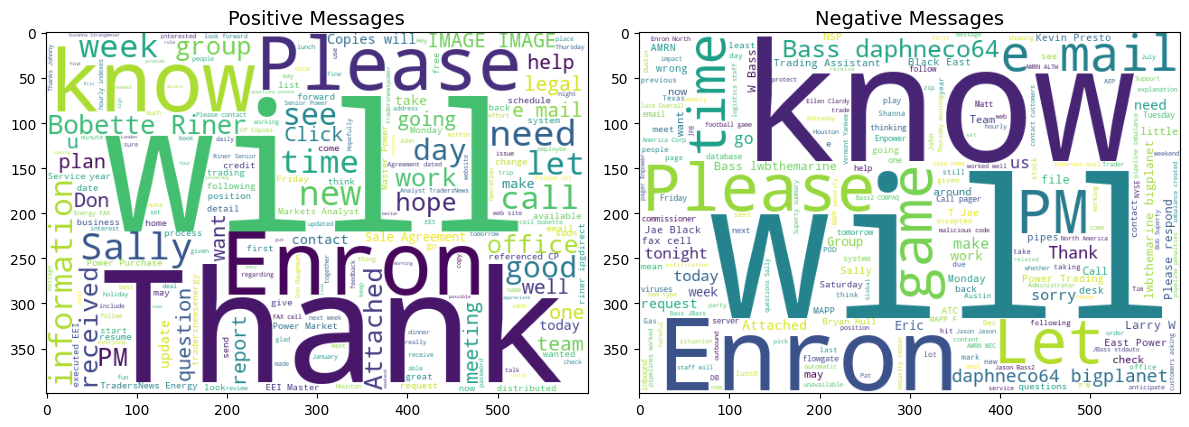

In [20]:
from wordcloud import WordCloud

text_col = 'body' if 'body' in df.columns else 'message'

# Positive word cloud
pos_text = ' '.join(df[df['sentiment']=='Positive'][text_col].astype(str))
neg_text = ' '.join(df[df['sentiment']=='Negative'][text_col].astype(str))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(pos_text))
plt.title("Positive Messages", fontsize=14)

plt.subplot(1,2,2)
plt.imshow(WordCloud(width=600, height=400, background_color='white').generate(neg_text))
plt.title("Negative Messages", fontsize=14)

plt.tight_layout()
plt.show()

/var/folders/c1/ypskr8394dlf3rvwrjmf4g940000gn/T/ipykernel_8843/2754126040.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='sentiment', y='msg_length', palette='coolwarm')


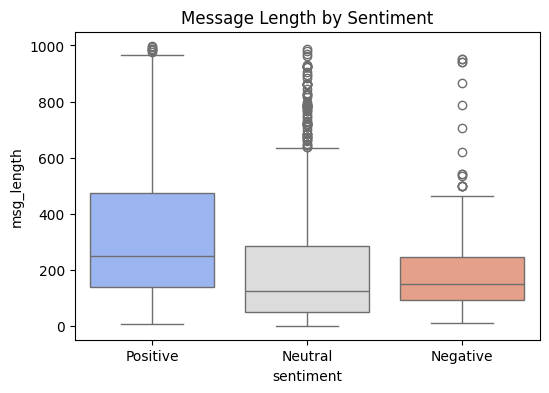

In [21]:
df['msg_length'] = df[text_col].astype(str).apply(len)

plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='sentiment', y='msg_length', palette='coolwarm')
plt.title("Message Length by Sentiment")
plt.show()


In [22]:
eda_summary = {
    "total_messages": len(df),
    "positive": df['sentiment'].value_counts().get('Positive', 0),
    "negative": df['sentiment'].value_counts().get('Negative', 0),
    "neutral": df['sentiment'].value_counts().get('Neutral', 0)
}

eda_summary_df = pd.DataFrame([eda_summary])
eda_summary_df.to_csv('eda_summary.csv', index=False)
print("✅ EDA summary saved as eda_summary.csv")


✅ EDA summary saved as eda_summary.csv


### Task 3: Data Preprocessing for Model Training

In [23]:
!pip install nltk scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [24]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/doyelmishra/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/doyelmishra/nltk_data...


True

In [25]:
df = pd.read_csv('sentiment_output.csv')

# Detect the correct text column name
text_col = 'body' if 'body' in df.columns else 'message'
print(f"Using text column: {text_col}")

Using text column: body


In [26]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text).lower()                                  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)       # Remove URLs
    text = re.sub(r'[^a-z\s]', '', text)                      # Remove punctuation/numbers
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df[text_col].apply(clean_text)
print(df[['clean_text', 'sentiment']].head())

                                          clean_text sentiment
0  enronoptions announcement updated enronoptions...  Positive
1  marc unfortunately today going work revenue mo...   Neutral
2       wednesday june gmt central time u canada cst   Neutral
3  thinking papasitos meet somewhere closer time ...  Negative
4  since never gave last time bet cutexas figured...   Neutral


In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['label'] = le.fit_transform(df['sentiment'])
print(df[['sentiment', 'label']].drop_duplicates())

  sentiment  label
0  Positive      2
1   Neutral      1
3  Negative      0


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label'], test_size=0.2, random_state=42, stratify=df['label']
)

print("Train size:", len(X_train))
print("Test size:", len(X_test))

Train size: 1752
Test size: 439


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [30]:
import joblib

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump((X_train_tfidf, X_test_tfidf, y_train, y_test), 'processed_data.pkl')

print("✅ Data preprocessing complete. Files saved for model training.")

✅ Data preprocessing complete. Files saved for model training.


### Task 4: Employee Ranking

In [34]:
print(df.columns)

Index(['Subject', 'body', 'date', 'from', 'sentiment', 'clean_text', 'label',
       'month'],
      dtype='object')


In [36]:
# Ensure 'date' is datetime
df['date'] = pd.to_datetime(df['date'])
# Month period (for aggregation)
df['month'] = df['date'].dt.to_period('M')

# Map sentiment to numeric scores
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['score'] = df['sentiment'].map(sentiment_map)

# Aggregate monthly scores per employee
monthly_scores = df.groupby(['from', 'month'])['score'].sum().reset_index()
monthly_scores = monthly_scores.sort_values(['month', 'score'], ascending=[True, False])
monthly_scores.head()

,from,month,score
120,kayne.coulter@enron.com,2010-01,5
168,patti.thompson@enron.com,2010-01,5
24,don.baughman@enron.com,2010-01,4
48,eric.bass@enron.com,2010-01,4
144,lydia.delgado@enron.com,2010-01,4


In [37]:
def rank_employees(monthly_scores_df):
    top_positive_list = []
    top_negative_list = []

    for month, group in monthly_scores_df.groupby('month'):
        # Top 3 Positive employees: descending score, then alphabetically by 'from'
        top_pos = group.sort_values(['score', 'from'], ascending=[False, True]).head(3)
        # Top 3 Negative employees: ascending score, then alphabetically
        top_neg = group.sort_values(['score', 'from'], ascending=[True, True]).head(3)
        
        top_positive_list.append(top_pos)
        top_negative_list.append(top_neg)

    return pd.concat(top_positive_list), pd.concat(top_negative_list)

In [38]:
top_positive, top_negative = rank_employees(monthly_scores)

print("Top 3 Positive Employees per Month:")
print(top_positive[['month', 'from', 'score']])

print("\nTop 3 Negative Employees per Month:")
print(top_negative[['month', 'from', 'score']])

Top 3 Positive Employees per Month:
       month                         from  score
120  2010-01      kayne.coulter@enron.com      5
168  2010-01     patti.thompson@enron.com      5
24   2010-01       don.baughman@enron.com      4
1    2010-02  bobette.riner@ipgdirect.com      7
73   2010-02        john.arnold@enron.com      7
..       ...                          ...    ...
142  2011-11      kayne.coulter@enron.com      7
22   2011-11  bobette.riner@ipgdirect.com      6
143  2011-12      kayne.coulter@enron.com      5
191  2011-12     patti.thompson@enron.com      5
71   2011-12          eric.bass@enron.com      4

[72 rows x 3 columns]

Top 3 Negative Employees per Month:
       month                         from  score
192  2010-01      rhonda.denton@enron.com      0
96   2010-01      johnny.palmer@enron.com      1
0    2010-01  bobette.riner@ipgdirect.com      2
145  2010-02      lydia.delgado@enron.com      1
169  2010-02     patti.thompson@enron.com      1
..       ...          

### Task 5: Flight Risk Identification

In [41]:
# Filter only negative messages
neg_df = df[df['sentiment'] == 'Negative'].copy()

In [42]:
neg_df = neg_df.sort_values(['from', 'date'])

In [43]:
# Set index for rolling calculation
neg_df.set_index('date', inplace=True)

# Function to count rolling negative messages per employee
flight_risk_list = []

for emp, group in neg_df.groupby('from'):
    # Rolling 30-day count of negative messages
    count_30d = group['sentiment'].rolling('30D').count()
    # If any 30-day count >= 4, mark as flight risk
    if (count_30d >= 4).any():
        flight_risk_list.append(emp)

# Convert to DataFrame
flight_risks = pd.DataFrame(flight_risk_list, columns=['Employee'])

In [44]:
print("Employees flagged as Flight Risks (4+ negative messages in 30 days):")
print(flight_risks)

Employees flagged as Flight Risks (4+ negative messages in 30 days):
                      Employee
0  bobette.riner@ipgdirect.com
1      johnny.palmer@enron.com
2      lydia.delgado@enron.com
3     patti.thompson@enron.com
4      rhonda.denton@enron.com
5         sally.beck@enron.com


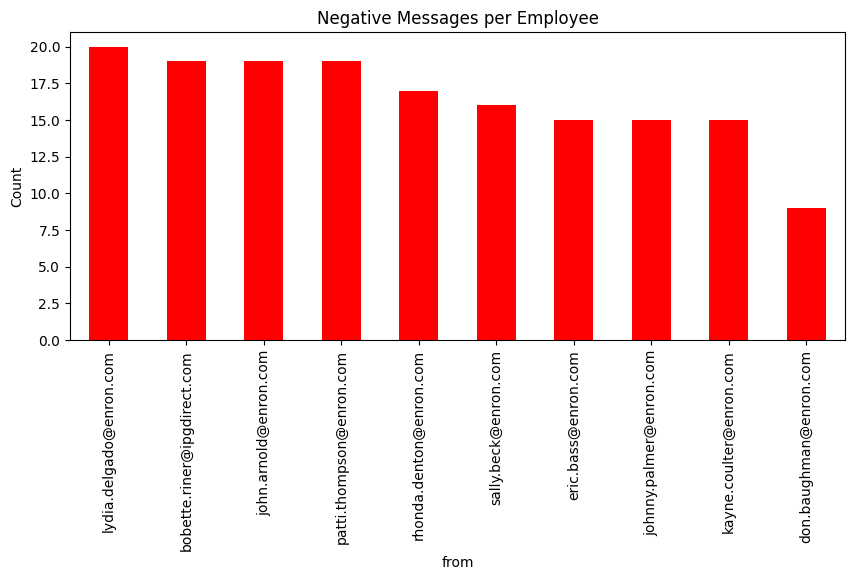

In [45]:
import matplotlib.pyplot as plt

neg_counts = df[df['sentiment']=='Negative'].groupby('from').size().sort_values(ascending=False)
neg_counts.plot(kind='bar', figsize=(10,4), color='red', title='Negative Messages per Employee')
plt.ylabel('Count')
plt.show()

### Task 6: Predictive Modeling

In [46]:
# Add text features
df['msg_length'] = df['clean_text'].str.len()
df['word_count'] = df['clean_text'].str.split().apply(len)

# Aggregate features per employee per month
features = df.groupby(['from', 'month']).agg(
    message_count=('clean_text', 'count'),
    avg_message_length=('msg_length', 'mean'),
    avg_word_count=('word_count', 'mean'),
    sentiment_score=('score', 'sum')  # Target variable
).reset_index()

features.head()

,from,month,message_count,avg_message_length,avg_word_count,sentiment_score
0,bobette.riner@ipgdirect.com,2010-01,2,71.500000,10.000000,2
1,bobette.riner@ipgdirect.com,2010-02,14,170.500000,22.928571,7
2,bobette.riner@ipgdirect.com,2010-03,11,163.272727,23.181818,4
3,bobette.riner@ipgdirect.com,2010-04,6,141.500000,18.166667,2
4,bobette.riner@ipgdirect.com,2010-05,4,104.250000,14.500000,1


In [47]:
from sklearn.model_selection import train_test_split

# Features and target
X = features[['message_count', 'avg_message_length', 'avg_word_count']]
y = features['sentiment_score']

# Split 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
from sklearn.linear_model import LinearRegression

# Initialize and train
model = LinearRegression()
model.fit(X_train, y_train)

print("✅ Linear Regression model trained successfully.")

✅ Linear Regression model trained successfully.


In [49]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2 score): {r2:.2f}")

Mean Squared Error (MSE): 3.97
R-squared (R2 score): 0.43


In [50]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_
})
print(feature_importance)

              feature  coefficient
0       message_count     0.343540
1  avg_message_length    -0.006211
2      avg_word_count     0.059953
